In [1]:
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk

def expand_pos_tag(tag):
    tag_definitions = {
         "NN": "Noun, singular or mass",
        "NNS": "Noun, plural",
        "NNP": "Proper noun, singular",
        "NNPS": "Proper noun, plural",
        "VB": "Verb, base form",
        "VBD": "Verb, past tense",
        "VBG": "Verb, gerund or present participle",
        "VBN": "Verb, past participle",
        "VBP": "Verb, non-3rd person singular present",
        "VBZ": "Verb, 3rd person singular present",
        "JJ": "Adjective",
        "JJR": "Adjective, comparative",
        "JJS": "Adjective, superlative",
        "RB": "Adverb",
        "RBR": "Adverb, comparative",
        "RBS": "Adverb, superlative",
        "PRP": "Personal pronoun",
        "PRP$": "Possessive pronoun",
        "IN": "Preposition or subordinating conjunction",
        "DT": "Determiner",
        "CC": "Coordinating conjunction",
        "CD": "Cardinal number",
        "MD": "Modal",
        "EX": "Existential there",
        "FW": "Foreign word",
        "POS": "Possessive ending",
        "RP": "Particle",
        "TO": "to",
        "WDT": "Wh-determiner",
        "WP": "Wh-pronoun",
        "WP$": "Possessive wh-pronoun",
        "WRB": "Wh-adverb"
    }
    return tag_definitions.get(tag, "Other")

def process_text(text1, text2):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))

    # Combine the two texts
    combined_text = text1 + " " + text2

    # Convert to lower case and remove punctuation, apostrophes, and quotations
    combined_text = combined_text.lower().translate(str.maketrans('', '', string.punctuation + "‘’“”"))

    # Tokenize and filter out stopwords
    tokens = word_tokenize(combined_text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    word_freq.update(filtered_tokens)

    # POS Tagging and expansion
    tagged = pos_tag(filtered_tokens)
    all_tags.update([expand_pos_tag(tag) for _, tag in tagged])

    return word_freq, all_tags

# Sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""

word_freq, all_tags = process_text(text_blurb1, text_blurb2)

# Print most common words and POS tags
print("Most common words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

print("\nMost common Part Of Speech tags:")
for tag, count in all_tags.most_common(10):
    print(f"{tag}: {count}")

Most common words:
mr: 9
said: 7
mrs: 6
jones: 6
johnson: 5
smith: 4
sir: 4
must: 4
know: 4
man: 4

Most common Part Of Speech tags:
Noun, singular or mass: 118
Adjective: 54
Verb, past tense: 38
Verb, gerund or present participle: 25
Adverb: 22
Noun, plural: 21
Verb, base form: 17
Modal: 10
Verb, past participle: 9
Preposition or subordinating conjunction: 9


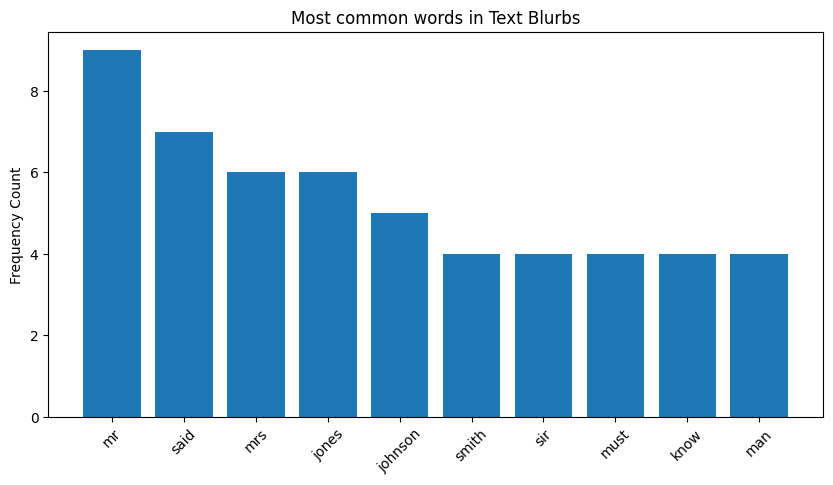

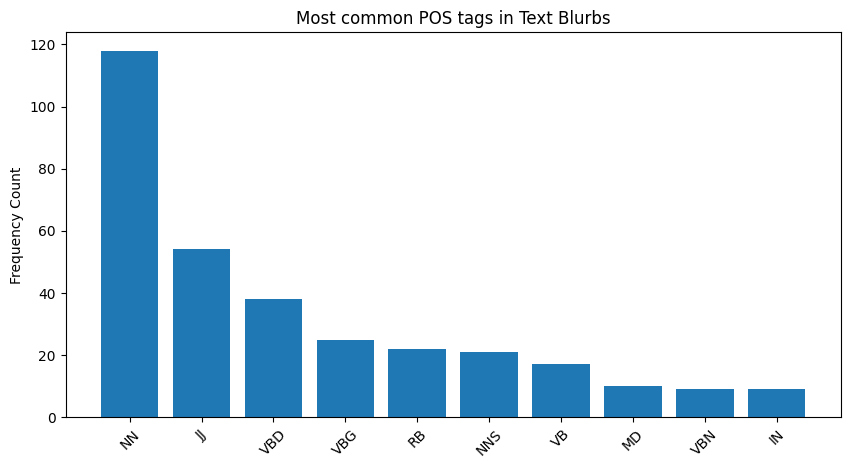

In [2]:
import matplotlib.pyplot as plt
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk

def plot_common_elements(counter, title):
    elements, counts = zip(*counter.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(elements, counts)
    plt.title(title)
    plt.ylabel("Frequency Count")
    plt.xticks(rotation=45)
    plt.show()

def process_text(text1, text2):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))

    # Combine the two texts
    combined_text = text1 + " " + text2

    # Convert to lower case and remove punctuation
    combined_text = combined_text.lower().translate(str.maketrans('', '', string.punctuation + "‘’“”"))

    # Tokenize and filter out stopwords
    tokens = word_tokenize(combined_text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    word_freq.update(filtered_tokens)

    # POS Tagging
    tagged = pos_tag(filtered_tokens)
    all_tags.update([tag for _, tag in tagged])

    return word_freq, all_tags

# Sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""
word_freq, all_tags = process_text(text_blurb1, text_blurb2)

# Visualize the most common words and POS tags from the combined text blurbs
plot_common_elements(word_freq, "Most common words in Text Blurbs")
plot_common_elements(all_tags, "Most common POS tags in Text Blurbs")

Total number of sentences: 44
Total number of words: 802
Part Of Speech counts: {'NUM': 4, 'ADJ': 42, 'NOUN': 107, 'PUNCT': 138, 'PROPN': 37, 'AUX': 33, 'VERB': 108, 'PRON': 110, 'ADP': 72, 'DET': 49, 'SCONJ': 15, 'PART': 14, 'CCONJ': 22, 'ADV': 31, 'SPACE': 17, 'INTJ': 3}


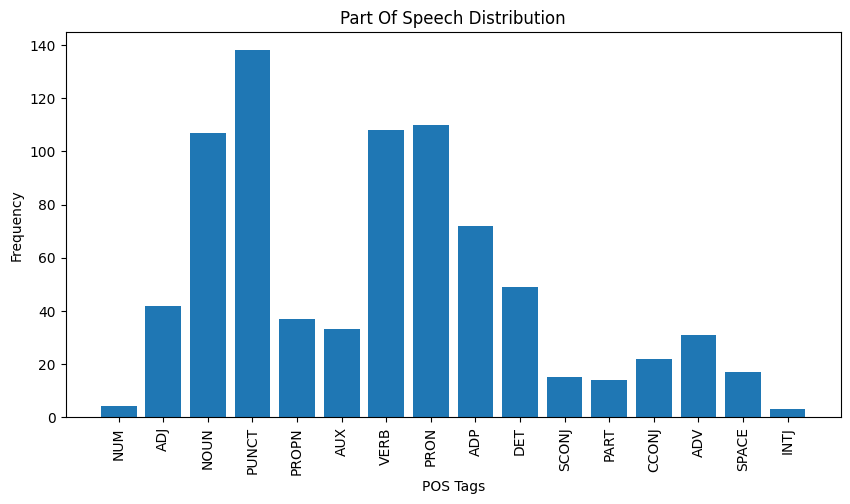

In [3]:
import matplotlib.pyplot as plt
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_sentence_structure(text1, text2):
    sentence_count = 0
    word_count = 0
    pos_count = {}

    # Process each text separately and combine the results
    for text in [text1, text2]:
        doc = nlp(text)
        for sent in doc.sents:
            sentence_count += 1
            for token in sent:
                word_count += 1
                pos_count[token.pos_] = pos_count.get(token.pos_, 0) + 1

    return sentence_count, word_count, pos_count

def plot_pos_distribution(pos_count):
    labels, values = zip(*pos_count.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title('Part Of Speech Distribution')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

# Sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""
sentence_count, word_count, pos_count = analyze_sentence_structure(text_blurb1, text_blurb2)

print(f"Total number of sentences: {sentence_count}")
print(f"Total number of words: {word_count}")
print("Part Of Speech counts:", pos_count)

# Visualize the POS distribution
plot_pos_distribution(pos_count)


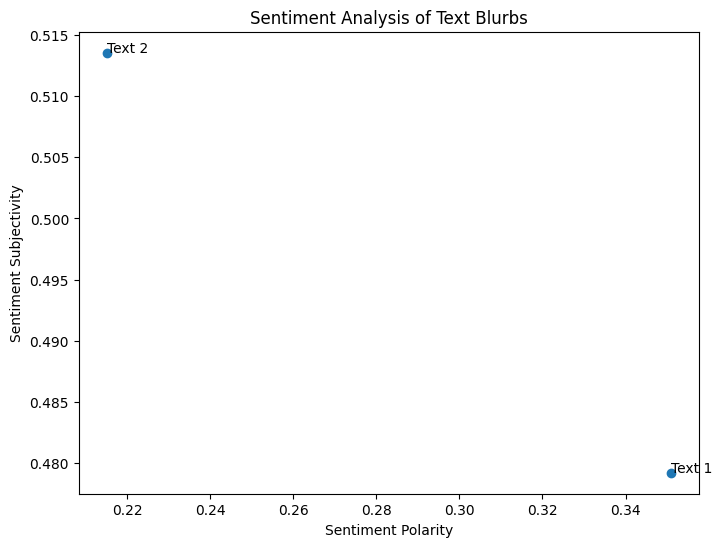

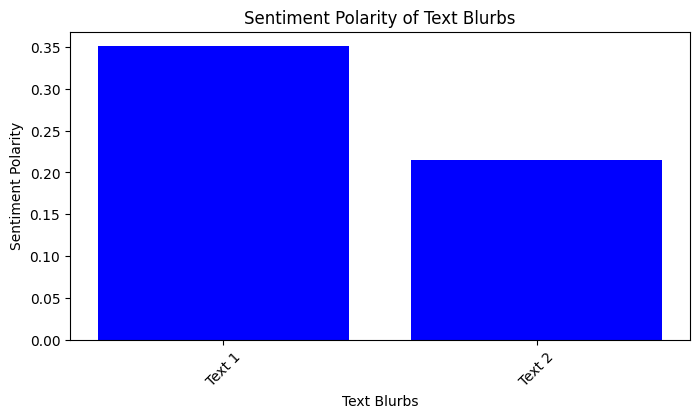

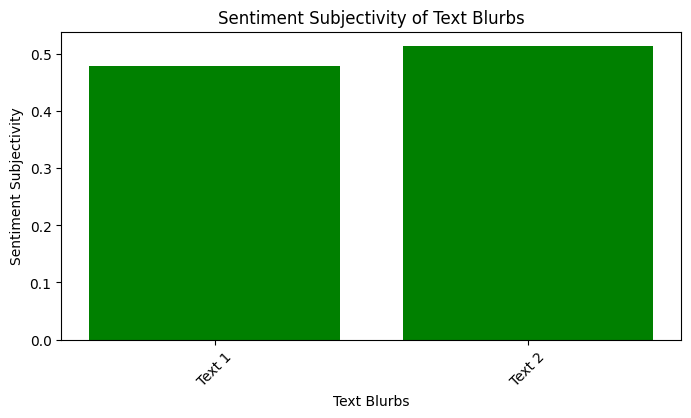

In [4]:
import matplotlib.pyplot as plt
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Two sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""
# Analyze sentiment of the text blurbs
sentiment1 = analyze_sentiment(text_blurb1)
sentiment2 = analyze_sentiment(text_blurb2)

sentiments = [("Text 1", sentiment1.polarity, sentiment1.subjectivity),
              ("Text 2", sentiment2.polarity, sentiment2.subjectivity)]

# Extracting labels, polarities, and subjectivities
labels, polarities, subjectivities = zip(*sentiments)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(polarities, subjectivities)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Analysis of Text Blurbs')
for i, label in enumerate(labels):
    plt.annotate(label, (polarities[i], subjectivities[i]))
plt.show()

# Bar Chart for Polarity
plt.figure(figsize=(8, 4))
plt.bar(labels, polarities, color='blue')
plt.xlabel('Text Blurbs')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity of Text Blurbs')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Subjectivity
plt.figure(figsize=(8, 4))
plt.bar(labels, subjectivities, color='green')
plt.xlabel('Text Blurbs')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Subjectivity of Text Blurbs')
plt.xticks(rotation=45)
plt.show()

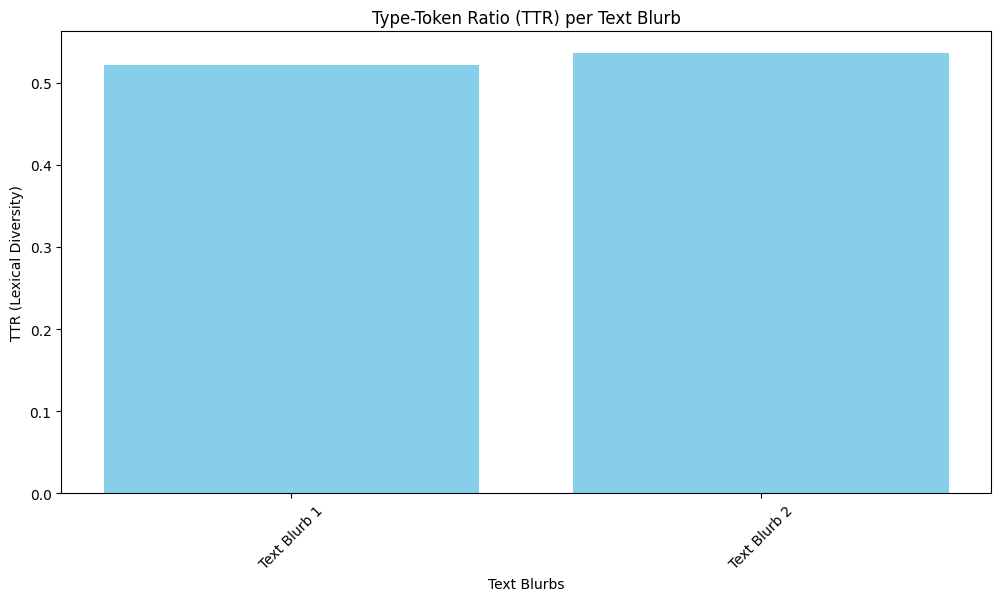

Overall Lexical Diversity for both Text Blurbs: 0.428


In [5]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Function to calculate TTR
def calculate_ttr(text):
    tokens = word_tokenize(text)
    types = set(tokens)
    if len(tokens) == 0:
        return 0
    return len(types) / len(tokens)

# Function to plot TTR
def plot_ttr(ttr_values, title):
    blurbs, ttr_scores = zip(*ttr_values)
    plt.figure(figsize=(12, 6))
    plt.bar(blurbs, ttr_scores, color='skyblue')
    plt.xlabel('Text Blurbs')
    plt.ylabel('TTR (Lexical Diversity)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""

ttr_values = [
    ("Text Blurb 1", calculate_ttr(text_blurb1)),
    ("Text Blurb 2", calculate_ttr(text_blurb2))
]

# Plot TTR for each text blurb
plot_ttr(ttr_values, "Type-Token Ratio (TTR) per Text Blurb")

# Overall TTR for both text blurbs combined
overall_text = text_blurb1 + " " + text_blurb2
overall_ttr = calculate_ttr(overall_text)
print(f"Overall Lexical Diversity for both Text Blurbs: {overall_ttr:.3f}")

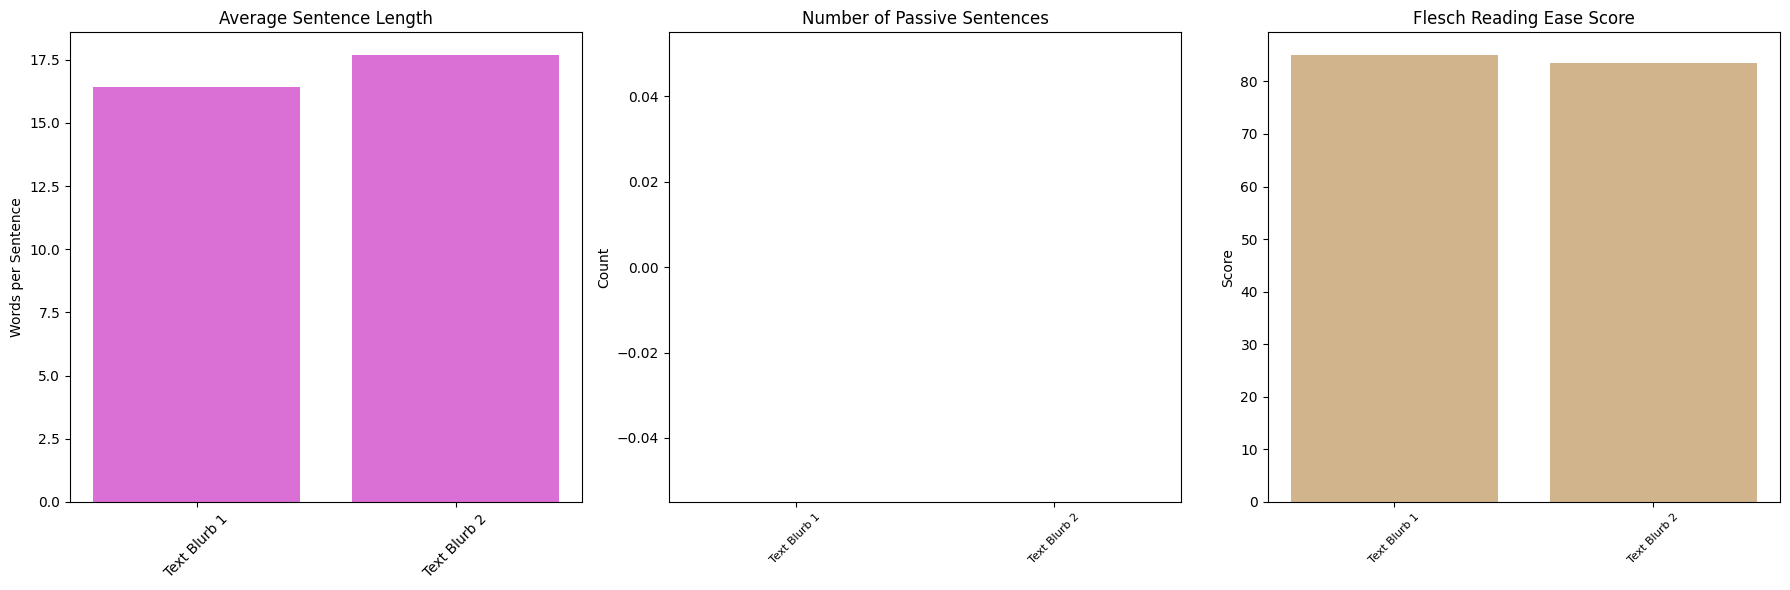

In [6]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import textstat

# Function to analyze the style of a given text
def analyze_style(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0, 0, 0  # Avoid division by zero

    average_sentence_length = sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)
    blob = TextBlob(text)
    passive_sentences = sum(1 for sentence in blob.sentences if sentence.tags and sentence.tags[0][1] in ['VBN', 'VBD'])

    flesch_reading_ease = textstat.flesch_reading_ease(text)

    return average_sentence_length, passive_sentences, flesch_reading_ease

# Sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""
# Analyze style for each text blurb
style_data = [
    ("Text Blurb 1", *analyze_style(text_blurb1)),
    ("Text Blurb 2", *analyze_style(text_blurb2))
]

# Extracting data for visualization
blurbs, avg_lengths, passive_counts, reading_eases = zip(*style_data)

# Visualization
plt.figure(figsize=(18, 6))  # Increase the size of the figure

# Average Sentence Length
plt.subplot(1, 3, 1)
plt.bar(blurbs, avg_lengths, color='orchid')
plt.title('Average Sentence Length')
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust font size
plt.ylabel('Words per Sentence')

# Passive Sentences Count
plt.subplot(1, 3, 2)
plt.bar(blurbs, passive_counts, color='lightpink')
plt.title('Number of Passive Sentences')
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Count')

# Flesch Reading Ease Score
plt.subplot(1, 3, 3)
plt.bar(blurbs, reading_eases, color='tan')
plt.title('Flesch Reading Ease Score')
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Score')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [7]:
import spacy
import re

nlp = spacy.load('en_core_web_sm')

def extract_dialogues(text):
    dialogues = re.findall(r'“([^”]+)”', text)
    cleaned_dialogues = [' '.join(dialogue.split()) for dialogue in dialogues]  # Remove extra spaces and newlines
    return cleaned_dialogues

def extract_characters_and_dialogues(text):
    doc = nlp(text)
    characters = set([ent.text for ent in doc.ents if ent.label_ == "PERSON"])
    dialogues = extract_dialogues(text)
    return characters, dialogues

# Sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""
# Extract and print characters and dialogues for each text blurb
print("Text Blurb 1:")
characters1, dialogues1 = extract_characters_and_dialogues(text_blurb1)
print("Characters:", characters1)
print("Sample Dialogues:", dialogues1[:5])  # Display first 5 dialogues

print("\nText Blurb 2:")
characters2, dialogues2 = extract_characters_and_dialogues(text_blurb2)
print("Characters:", characters2)
print("Sample Dialogues:", dialogues2[:5])  # Display first 5 dialogues

Text Blurb 1:
Characters: {'Jones', 'Smith'}
Sample Dialogues: []

Text Blurb 2:
Characters: {'Edward', 'Johnson'}
Sample Dialogues: []


In [8]:
import spacy
from collections import defaultdict

nlp = spacy.load('en_core_web_sm')

def extract_interactions(text):
    doc = nlp(text)
    interactions = defaultdict(int)

    for sent in doc.sents:
        characters = set([ent.text for ent in sent.ents if ent.label_ == "PERSON"])
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    interactions[(char1, char2)] += 1

    return interactions

# Sample text blurbs
text_blurb1 = """One fine spring morning, Mr. Smith was taking his daily stroll through the park when he spotted a lovely lady, Mrs. Jones, sitting on a bench reading a book. He couldn't help but be drawn to her beauty and grace, so he approached her with a smile.

"Good morrow, my dear," he said with a bow of his head. "Might I join you?"

Mrs. Jones looked up from her book and smiled at him. "Of course, sir," she replied. "Please do."

The two of them struck up a conversation, discussing everything from the weather to their shared love of literature. As they talked, Mr. Smith found himself growing more and more enamored of Mrs. Jones. Her sparkling eyes and quick wit were like nothing he had ever encountered before.

"You are quite the delightful conversationalist, madam," he said with a chuckle. "I must confess, I find myself in your debt for the pleasure of your company."

Mrs. Jones blushed prettily at his words and leaned in closer to him. "And I must thank you for the compliment, sir," she said with a sly grin. "You are quite the charming gentleman yourself."

As the sun began to set, Mr. Smith knew that it was time to bid Mrs. Jones farewell. But he promised to see her again soon, and left her with a little smile on his face.

"Until we meet again, my dear," he said with a nod. "May our next encounter be even more enjoyable than this one."

Mrs. Jones nodded in agreement and watched as Mr. Smith disappeared into the crowd. She couldn't help but feel a sense of excitement and anticipation about the possibility of seeing him again. For though their acquaintance was still in its infancy, she knew that she had found someone special. Someone who made her feel alive and appreciated in a way she never thought possible."""
text_blurb2 = """One sunny afternoon, Mr. Johnson would stroll through his little garden, tending to his blooming flowers and lush greenery. He would pause at the gate, gazing out at the beauty of the world beyond. Little did he know, his life was about to change in the most unexpected way.

As he stood there, a man approached him, dressed in fine attire and carrying a small bouquet of wildflowers. "Good day, sir," the man said with a bow. "I hope I find you well."

Mr. Johnson must have looked surprised, for the man continued, "My name is Edward, and I've come to ask for your hand in marriage."

The old gentleman blinked, taken aback by the sudden proposal. "Knowledge of my intentions?" he asked, chuckling softly.

Edward smiled, his eyes shining with excitement. "Oh, I could not help but notice your charming ways, good sir. And I must admit, I find myself quite smitten with your gentle nature."

Mr. Johnson found himself warming to the young suitor, his heart swelling with joy. "Well, I suppose it couldn't hurt to get to know you better," he said with a nod.

And so, the two men spent the rest of the day together, getting to know each other over cups of tea and rousing conversations. As the sun set, they walked through the gardens, their hands brushing as they strolled. It was clear to both of them that this was the start of something special.

"You know, I rather like you, Mr. Johnson," Edward said, looking up at his companion with a mischievous glint in his eye.

Mr. Johnson chuckled, feeling a warmth spread throughout his body. "I think I might be falling for you, young man," he replied, his voice filled with amusement.

And so, the unlikely pair became fast friends, their bond growing stronger with each passing day. They knew that their love was not without its challenges, but they were determined to make it work, no matter what lay ahead."""
# Extract and print interactions for each text blurb
print("Interactions in Text Blurb 1:")
interactions1 = extract_interactions(text_blurb1)
for pair, count in interactions1.items():
    print(f"{pair}: {count}")

print("\nInteractions in Text Blurb 2:")
interactions2 = extract_interactions(text_blurb2)
for pair, count in interactions2.items():
    print(f"{pair}: {count}")

Interactions in Text Blurb 1:
('Jones', 'Smith'): 4
('Smith', 'Jones'): 4

Interactions in Text Blurb 2:
('Edward', 'Johnson'): 2
('Johnson', 'Edward'): 2
